<a href="https://colab.research.google.com/github/HiveCase/MachineLearningPractice/blob/main/Week2/GA/MLP_GradedAssignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Graded Assignment 2

In [23]:
# prompt: how to import sklearn of 1.2.2 version

!pip install -U scikit-learn==1.2.2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 46.2 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
mlxtend 0.23.4 requires scikit-learn>=1.3.1, but you have scikit-learn 1.2.2 which is incompatible.
imbalanced-learn 0.13.0 requires scikit-learn<2,>=1.3.2, but you have scikit-learn 1.2.2 which is incompatible.


In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv('Week3_GA_dataset.csv')
df

In [17]:
df.shape

(748, 6)

In [12]:
columns  = df.columns
columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'Target'], dtype='object')

In [15]:
df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      748 non-null    object 
 1   V2      748 non-null    object 
 2   V3      748 non-null    float64
 3   V4      748 non-null    float64
 4   V5      748 non-null    object 
 5   Target  748 non-null    object 
dtypes: float64(2), object(4)
memory usage: 35.2+ KB


###Question 1:
How many features remain after applying following pipeline to the feature matrix? <br>
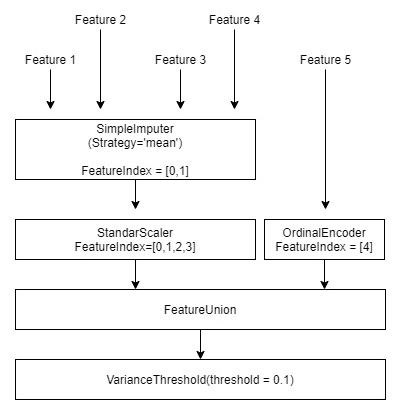

In [18]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import VarianceThreshold

# Replace '?' with np.nan
df.replace('?', np.nan, inplace=True)

# Convert columns to appropriate types
for col in ['V1', 'V2']:
    df[col] = pd.to_numeric(df[col])

# Separate features and target
X = df[['V1', 'V2', 'V3', 'V4', 'V5']]

# Preprocessing steps
numeric_features = ['V1', 'V2', 'V3', 'V4']  # FeatureIndex = [0,1,2,3]
categorical_features = ['V5']  # FeatureIndex = [4]

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),   # applies to V1, V2
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('encoder', OrdinalEncoder())
])

# Combine preprocessing
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])

# Full pipeline with variance threshold
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('var_thresh', VarianceThreshold(threshold=0.1))
])

# Fit and transform the data
X_transformed = pipeline.fit_transform(X)

# Output the number of remaining features
print("Number of features after pipeline:", X_transformed.shape[1])


Number of features after pipeline: 4
